In [4]:
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

模型準確度:0.90


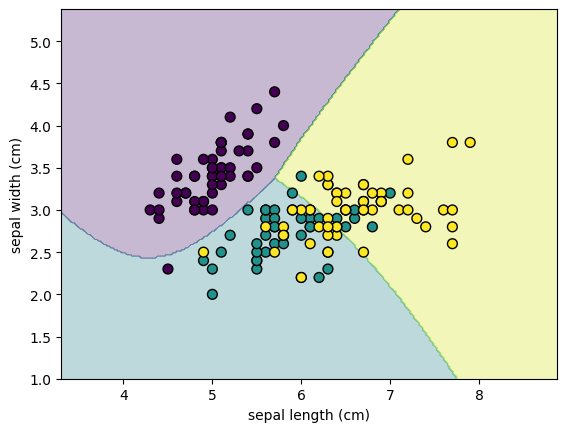

In [ ]:
from sklearn.datasets import load_iris
from sklearn.utils._bunch import Bunch
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt

iris:Bunch = load_iris()
X:ndarray = iris.data[:, :2] #花萼長度和花萼寬度
y:ndarray = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3.建立高斯樸素貝斯模型
model:GaussianNB = GaussianNB()

#4.訓練模型
model = model.fit(X=X_train, y=y_train)

#5.進行預測
y_predic:ndarray = model.predict(X=X_test)

#6.評估模型
accuracy:float = accuracy_score(y_true=y_test, y_pred=y_predic)
print(f"模型準確度:{accuracy:.2f}")

#7. 可視化決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0],X[:, 1],c=y,s=50,edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('高斯樸素貝氏分類邊界')
plt.show()